# EDA on Assets

## Import necessary libraries

In [25]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Loading and displaying a single image for debugging

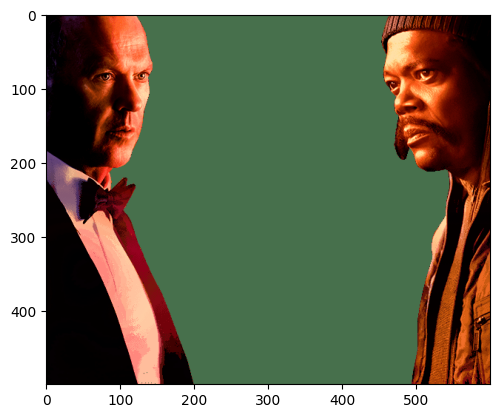

In [26]:
image_path = '/home/tewodros_cheru/Challenge_Data/Assets/3c35998c3f4a279a008ac3ffd8481fea/landing_1.png'
image = cv2.imread(image_path)
if image is None or image.size == 0:
    print("Failed to load image or image is empty.")
else:
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

## Defining the Assets directory and different functions

In [27]:
# Define the input directory
input_dir = '/home/tewodros_cheru/Challenge_Data/Assets/'

# Function to display an image
def display_image(image, title):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Function to display multiple video frames and return statistics
def display_video_frames_and_stats(video_path, num_frames=5):
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    interval = total_frames // num_frames

    frame_stats = []
    for i in range(0, total_frames, interval):
        cap.set(cv2.CAP_PROP_POS_FRAMES, i)
        ret, frame = cap.read()
        if ret:
            display_image(frame, f'Frame {i}')
            stats = image_statistics(frame)
            frame_stats.append((i, stats))
        if len(frame_stats) >= num_frames:
            break

    cap.release()
    return frame_stats

# Function to calculate basic statistics for an image
def image_statistics(image):
    mean_color = np.mean(image, axis=(0, 1))
    return mean_color

## Select a specific folder for EDA

In [28]:
selected_folder = '3c35998c3f4a279a008ac3ffd8481fea'  # Change this to the folder you want to analyze
selected_folder_path = os.path.join(input_dir, selected_folder)

image_statistics_list = []
print(f"Exploring folder: {selected_folder}")

Exploring folder: 3c35998c3f4a279a008ac3ffd8481fea


### Process all images

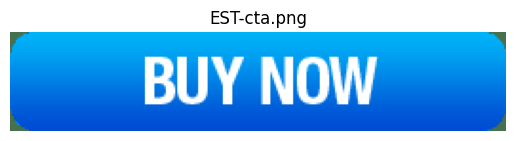

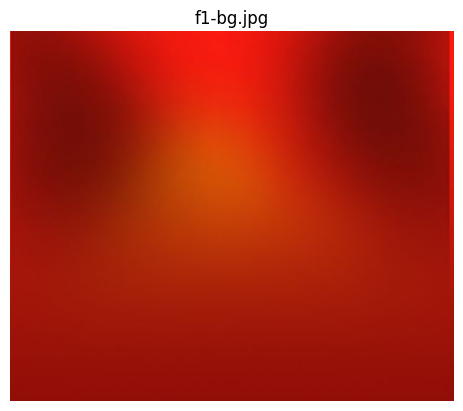

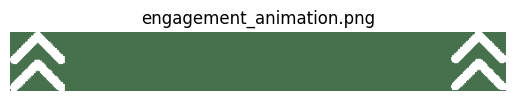

In [29]:
image_count = 0
for file_name in os.listdir(selected_folder_path):
    file_path = os.path.join(selected_folder_path, file_name)
    if file_name.endswith('.jpg') or file_name.endswith('.png'):
        image = cv2.imread(file_path)
        stats = image_statistics(image)
        image_statistics_list.append((file_name, stats))
        image_count += 1
        if image_count <= 3:  # Display only the first 3 images
            display_image(image, file_name)

### Display overall statistics of images

In [30]:
mean_colors = np.array([stats for _, stats in image_statistics_list])
overall_mean_color = np.mean(mean_colors, axis=0)
print(f"Overall Mean Color: {overall_mean_color}")

Overall Mean Color: [100.9429067  105.00394086  85.08613159]


### Print individual image statistics

In [31]:
for file_name, stats in image_statistics_list:
    print(f"Image Statistics for {file_name}: Mean Color - {stats}")

Image Statistics for EST-cta.png: Mean Color - [230.70719128 142.58834365  31.60285883]
Image Statistics for f1-bg.jpg: Mean Color - [  8.94424     27.08721667 165.49637   ]
Image Statistics for engagement_animation.png: Mean Color - [ 91.65839253 124.50921861  87.0957778 ]
Image Statistics for est-cta.png: Mean Color - [230.70719128 142.58834365  31.60285883]
Image Statistics for end-background.jpg: Mean Color - [ 43.10629     54.18394333 107.54243333]
Image Statistics for landing_2.png: Mean Color - [57.23691905 68.14234762 29.48325714]
Image Statistics for SMOKE.png: Mean Color - [ 21.24309667  59.28816    156.77042667]
Image Statistics for est-copy.png: Mean Color - [135.89615385 159.85       132.56923077]
Image Statistics for _preview.png: Mean Color - [ 46.15408     53.28759    100.60981667]
Image Statistics for mpu-click_area.png: Mean Color - [ 75.99975    111.99965333  70.99979667]
Image Statistics for cta.png: Mean Color - [231.14721485 144.95498084  37.08480696]
Image Statis

### Process video file

Video: video.mp4


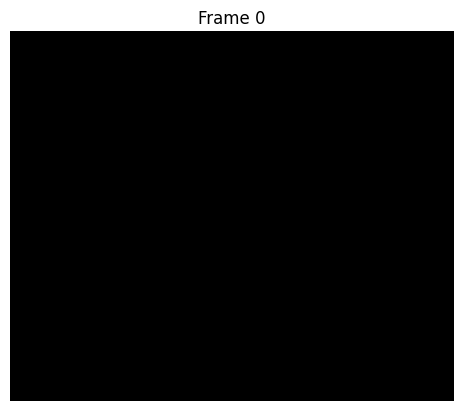

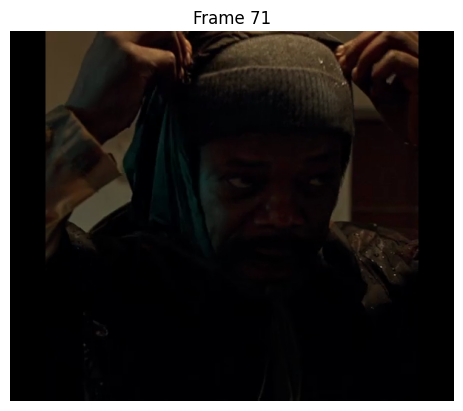

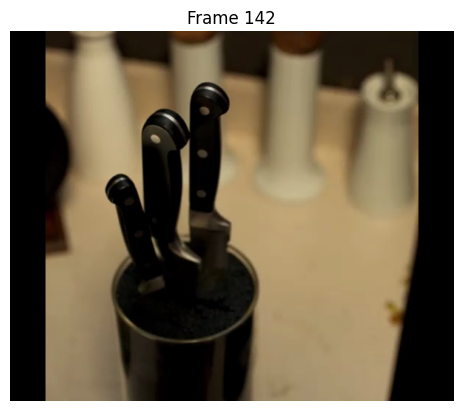

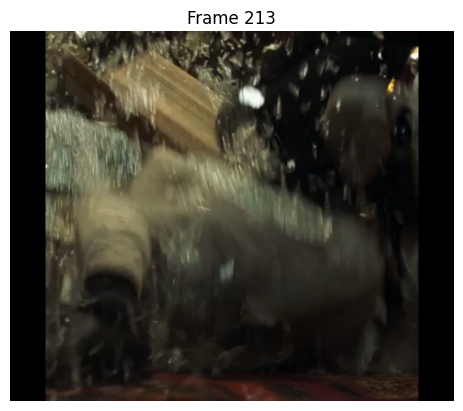

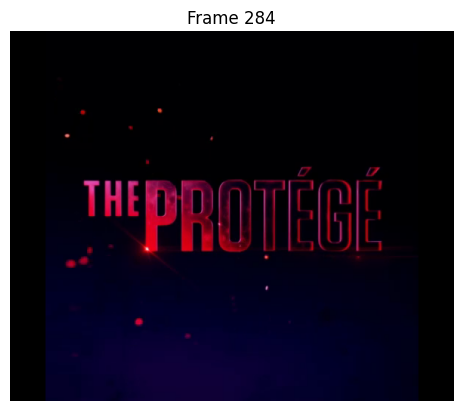

In [32]:
for file_name in os.listdir(selected_folder_path):
    file_path = os.path.join(selected_folder_path, file_name)
    if file_name.endswith('.mp4'):
        print(f"Video: {file_name}")
        video_stats = display_video_frames_and_stats(file_path, num_frames=5)
        break  # Process only the first video file

### Print video frame statistics

In [34]:
for frame_number, stats in video_stats:
    print(f"Frame {frame_number} Statistics: Mean Color - {stats}")

Frame 0 Statistics: Mean Color - [0. 0. 0.]
Frame 71 Statistics: Mean Color - [ 8.86778    10.61415333 14.53453   ]
Frame 142 Statistics: Mean Color - [57.37161    80.60779667 94.29533   ]
Frame 213 Statistics: Mean Color - [34.44746333 44.79913333 48.21645667]
Frame 284 Statistics: Mean Color - [16.58468667  0.84430667  9.14713   ]
